In [1]:
import sys, os, re, copy
import dill as pickle # this serializes all the functions inside the quantification dict
import numpy as np
import scipy as sp
from scipy.optimize import newton, minimize, fsolve
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.gridspec import GridSpec
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True
})
sns.set(font_scale=1)
palette = list(mcolors.TABLEAU_COLORS.keys())
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [2]:
plot_df = pd.read_excel('asp_fate_plotting.xlsx')
plot_df

,Fate,Asn efflux,Percent
0,Protein (Asp),Yes,27.935361
1,Efflux (Asn),Yes,25.992724
2,Protein (Asn),Yes,17.268010
3,Pyrimidines,Yes,14.401952
4,Purines,Yes,14.401952
5,Protein (Asp),No,37.746777
6,Efflux (Asn),No,0.000000
7,Protein (Asn),No,23.332855
8,Pyrimidines,No,19.460184
9,Purines,No,19.460184


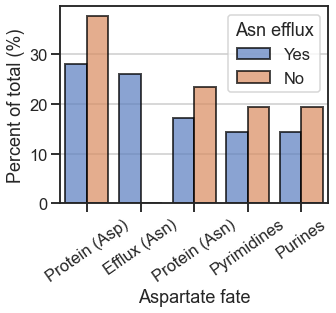

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4.7))

g1 = sns.barplot(ax=ax1, x="Fate", y="Percent", hue="Asn efflux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)

g1.grid(True, axis='y')
g1.set_ylabel('Percent of total (%)');
g1.set_xlabel('Aspartate fate');
g1.set_xticklabels(g1.get_xticklabels(), rotation=35);

fig.tight_layout()
fig.savefig('asp_fate.pdf')

In [4]:
plot_df = pd.read_excel('asp_fate2_plotting.xlsx')
plot_df

,Fate,Flux,Percent,Nitrogen donation
0,Protein (Arg),2.881181,22.506423,True
1,Protein (Asp),2.585267,20.194886,False
2,Purines,1.999235,15.617077,True
3,Protein (Asn),1.598061,12.483300,False
4,Pyrimidines,1.332823,10.411384,False
5,Efflux (Asn)*,2.405026,18.786930,False


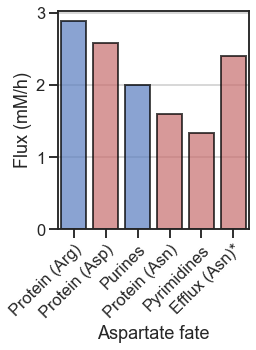

In [7]:
pal = list(sns.color_palette())
new_pal = [pal[0] if nd else pal[3] for nd in plot_df['Nitrogen donation']]
#new_pal[-1] = pal[7]


fig, ax1 = plt.subplots(1, 1, figsize=(4, 5.2))

#g1 = sns.barplot(ax=ax1, x="Fate", y="Flux", hue="Asn efflux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)
#pal = list(sns.color_palette())
#pal[5] = pal[7]
g1 = sns.barplot(ax=ax1, x="Fate", y="Flux", data=plot_df, capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7, palette=new_pal)

g1.grid(True, axis='y')
g1.set_ylabel('Flux (mM/h)');
g1.set_xlabel('Aspartate fate');
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

fig.tight_layout()
fig.savefig('asp_fate2.pdf')